In [8]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sympy as sy

PART 1

In [9]:
data = pd.read_csv('World-happiness-report-2024.csv')
data.head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [10]:
print(data.shape)
data.columns
data.dtypes

(143, 12)


Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

In [11]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [12]:
print(data.duplicated().sum())

0


In [13]:
data.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.530893,5.644057,5.417700,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.181247,1.165108,1.198051,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.631750,4.762250,4.503750,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.800500,5.911000,5.676500,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.426250,6.515250,6.338250,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [14]:
data[['Country name','Regional indicator']].nunique()

Country name          140
Regional indicator     10
dtype: int64

In [15]:
high = data.sort_values(by='Ladder score',ascending=False)
display(high.head(1))

display(data['Regional indicator'].value_counts().head(1))
#data.groupby('Regional indicator').size().nlargest(1)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Regional indicator
Sub-Saharan Africa    35
Name: count, dtype: int64

PART 2

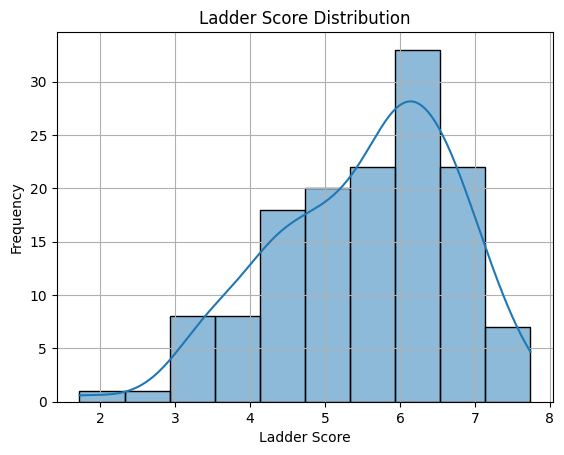

In [16]:
sns.histplot(data['Ladder score'],bins=10,kde=True)
plt.title('Ladder Score Distribution')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [17]:
top = data.nlargest(10,'Ladder score')
display(top[['Country name','Ladder score']])

,Country name,Ladder score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341
5,Netherlands,7.319
6,Norway,7.302
7,Luxembourg,7.122
8,Switzerland,7.060
9,Australia,7.057


In [18]:
bottom = data.nsmallest(10,'Ladder score')
display(bottom[['Country name','Ladder score']])

,Country name,Ladder score
142,Afghanistan,1.721
141,Lebanon,2.707
140,Lesotho,3.186
139,Sierra Leone,3.245
138,Congo (Kinshasa),3.295
137,Zimbabwe,3.341
136,Botswana,3.383
135,Malawi,3.421
133,Zambia,3.502
134,Eswatini,3.502


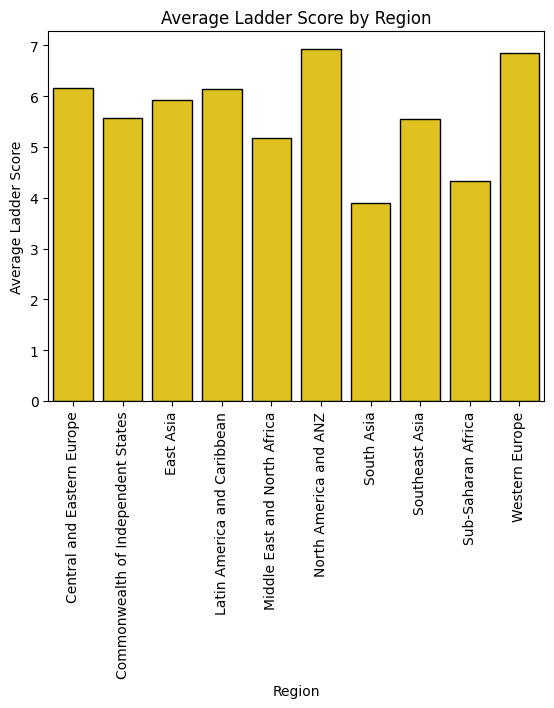

In [19]:
know = data.groupby('Regional indicator')['Ladder score'].mean()
know = pd.DataFrame(know)
sns.barplot(x=know.index,y='Ladder score',data=know,color = 'gold',edgecolor = 'black')
plt.title('Average Ladder Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Ladder Score')
plt.xticks(rotation=90)
plt.show()

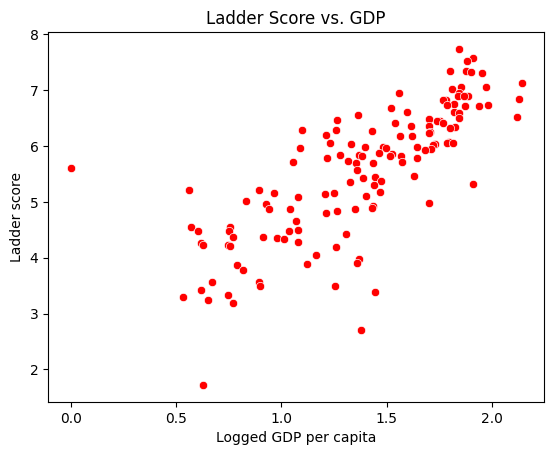

In [20]:
sns.scatterplot(x='Log GDP per capita',y='Ladder score',data=data,color = 'red')
plt.title('Ladder Score vs. GDP')
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder score')
plt.show()

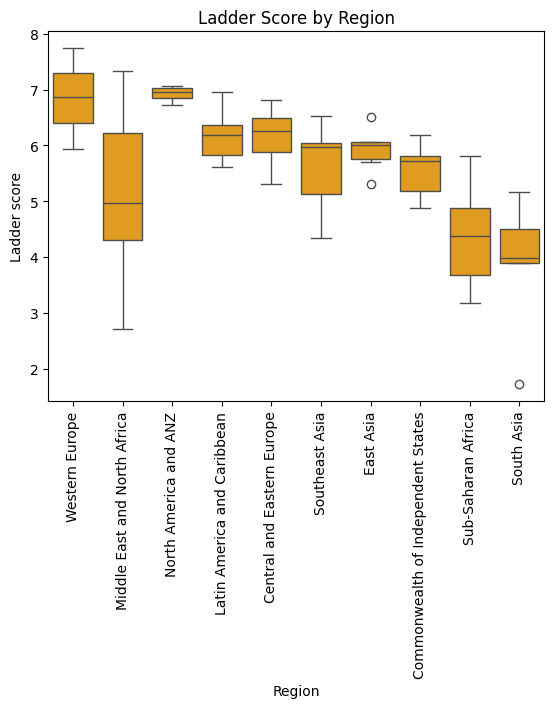

In [21]:
sns.boxplot(x='Regional indicator',y='Ladder score',data=data,color = 'orange')
plt.title('Ladder Score by Region')
plt.xlabel('Region')
plt.ylabel('Ladder score')
plt.xticks(rotation=90)
plt.show()

PART 3

In [22]:
print(data['Ladder score'].mean())
display(data['Ladder score'].median())
display(data['Ladder score'].mode())
print()
print("Standard deviation :",data['Ladder score'].std())
print("Variance :",data['Ladder score'].var())

5.530892857142858


np.float64(5.8004999999999995)

0    3.502
1    5.816
2    6.188
Name: Ladder score, dtype: float64


Standard deviation : 1.181246864082799
Variance : 1.395344153905447


In [23]:
percentage = data[data['Ladder score'].mean() > data['Ladder score']]

print(percentage.size/data.size*100)

43.57142857142857


In [24]:
tops = data.sort_values(by='Ladder score',ascending=False)
tops = tops.head(20)
display(tops['Regional indicator'].value_counts().nlargest(1))

Regional indicator
Western Europe    12
Name: count, dtype: int64

PART 4

In [25]:
filtered = data[['Ladder score', 'Log GDP per capita']].dropna()
usecase = filtered['Ladder score'].to_numpy()
usecasee = filtered['Log GDP per capita'].to_numpy()

print(np.add(usecase,usecasee))
print()
print(np.subtract(usecase,usecasee))

[9.585 9.491 9.406 9.222 9.144 9.22  9.254 9.263 9.03  8.911 8.839 8.516
 8.796 8.79  8.74  8.762 8.967 8.605 8.584 8.571 8.529 8.716 8.664 8.59
 8.199 8.207 8.427 8.436 7.925 8.641 8.345 8.19  7.734 8.2   8.18  8.187
 7.949 7.976 8.06  8.173 8.124 7.547 7.381 7.702 7.963 7.934 7.407 7.75
 7.81  7.862 7.846 7.873 7.28  7.374 7.758 7.739 7.375 7.46  7.621 7.47
 7.059 7.652 7.618 7.342 7.392 7.122 7.212 7.34  7.386 7.201 7.427 7.001
 7.04  6.768 7.278 7.049 7.132 5.607 6.929 7.092 6.899 6.811 6.844 6.688
 7.225 6.742 6.113 5.776 6.652 6.415 6.123 6.347 6.509 6.16  5.854 6.677
 5.896 6.358 6.326 5.923 5.817 6.223 6.098 6.008 5.726 5.129 5.304 5.583
 5.235 5.074 5.507 5.728 5.291 5.144 5.332 5.352 5.366 4.888 4.979 4.856
 4.972 5.448 5.22  5.347 5.259 5.008 4.653 4.601 4.462 4.232 4.401 4.757
 4.038 4.828 4.089 3.829 3.899 3.957 4.084 2.349]

[5.897 5.675 5.644 5.466 5.538 5.418 5.35  4.981 5.09  5.203 5.219 5.394
 5.106 5.02  5.06  5.026 4.709 5.039 5.052 4.927 4.957 4.75  4.786 4.848
 5.

In [26]:
print(np.dot(usecase,usecasee))

1121.2850940000003


In [27]:
new_matrix = np.array([data['Log GDP per capita'],data['Social support']]).T
ask = np.array([0.5,0.5])
print(np.multiply(new_matrix,ask))

[[0.922  0.786 ]
 [0.954  0.76  ]
 [0.9405 0.8085]
 [0.939  0.7505]
 [0.9015 0.7565]
 [0.9505 0.731 ]
 [0.976  0.7585]
 [1.0705 0.6775]
 [0.985  0.7125]
 [0.927  0.7305]
 [0.905  0.7635]
 [0.7805 0.6865]
 [0.9225 0.682 ]
 [0.9425 0.668 ]
 [0.92   0.7295]
 [0.934  0.72  ]
 [1.0645 0.695 ]
 [0.8915 0.7555]
 [0.883  0.727 ]
 [0.911  0.663 ]
 [0.893  0.751 ]
 [0.9915 0.582 ]
 [0.9695 0.696 ]
 [0.9355 0.695 ]
 [0.7605 0.6205]
 [0.798  0.7155]
 [0.909  0.674 ]
 [0.921  0.6805]
 [0.682  0.6385]
 [1.059  0.6805]
 [0.921  0.673 ]
 [0.8495 0.618 ]
 [0.6325 0.54  ]
 [0.876  0.7635]
 [0.869  0.7085]
 [0.883  0.7355]
 [0.769  0.6955]
 [0.808  0.6845]
 [0.851  0.696 ]
 [0.9135 0.722 ]
 [0.9    0.664 ]
 [0.63   0.5845]
 [0.5485 0.6315]
 [0.715  0.6345]
 [0.853  0.77  ]
 [0.85   0.754 ]
 [0.606  0.697 ]
 [0.781  0.6905]
 [0.811  0.7285]
 [0.897  0.6085]
 [0.893  0.677 ]
 [0.9075 0.589 ]
 [0.616  0.573 ]
 [0.6655 0.6335]
 [0.864  0.684 ]
 [0.861  0.764 ]
 [0.699  0.704 ]
 [0.742  0.6735]
 [0.823  0.571

In [28]:
ladder = data['Ladder score'].to_numpy()
ladder = ladder[~np.isnan(ladder)]

normalized = (ladder - ladder.min())/(ladder.max() - ladder.min())
display(normalized)


array([1.        , 0.97375415, 0.9641196 , 0.93405316, 0.93355482,
       0.92990033, 0.92707641, 0.89717608, 0.88687708, 0.88637874,
       0.88172757, 0.86943522, 0.86877076, 0.86112957, 0.860299  ,
       0.85930233, 0.85      , 0.84734219, 0.84667774, 0.83521595,
       0.83421927, 0.83255814, 0.83122924, 0.83023256, 0.82342193,
       0.81229236, 0.81196013, 0.80946844, 0.80398671, 0.79767442,
       0.79435216, 0.7923588 , 0.78870432, 0.78521595, 0.78421927,
       0.7807309 , 0.77906977, 0.77059801, 0.77026578, 0.76827243,
       0.76461794, 0.75847176, 0.75797342, 0.75598007, 0.75348837,
       0.74966777, 0.74318937, 0.74202658, 0.74202658, 0.72209302,
       0.72076412, 0.72043189, 0.71877076, 0.7179402 , 0.71578073,
       0.71362126, 0.70697674, 0.70681063, 0.70664452, 0.70631229,
       0.70548173, 0.70116279, 0.69983389, 0.69036545, 0.68853821,
       0.6845515 , 0.68438538, 0.68139535, 0.68023256, 0.68023256,
       0.67508306, 0.67491694, 0.66511628, 0.66328904, 0.66212

In [29]:
from sympy import symbols, diff
GDP, Happiness = symbols('GDP Happiness')
Wellbeing_Index = (GDP * Happiness) + 0.5 * (Happiness - 5)**2
derivative = diff(Wellbeing_Index, Happiness)
print(derivative)


GDP + 1.0*Happiness - 5.0


In [30]:
data['is_happy'] = data['Ladder score'].apply(lambda x: 1 if x >= 7 else 0)
print(data['is_happy'])

0      1
1      1
2      1
3      1
4      1
      ..
138    0
139    0
140    0
141    0
142    0
Name: is_happy, Length: 140, dtype: int64


In [31]:
data["happiness_rank"] = data["Ladder score"].rank(method="dense", ascending=False).astype(int)
data = data.sort_values("happiness_rank")
print(data[["Country name", "Ladder score", "happiness_rank"]])

         Country name  Ladder score  happiness_rank
0             Finland         7.741               1
1             Denmark         7.583               2
2             Iceland         7.525               3
3              Sweden         7.344               4
4              Israel         7.341               5
..                ...           ...             ...
138  Congo (Kinshasa)         3.295             133
139      Sierra Leone         3.245             134
140           Lesotho         3.186             135
141           Lebanon         2.707             136
142       Afghanistan         1.721             137

[140 rows x 3 columns]


In [32]:
display(data.head())

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,is_happy,happiness_rank
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1,2
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1,3
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1,4
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,1,5


In [33]:
global_mean = data["Log GDP per capita"].mean()
data["above_average_gdp"] = (data["Log GDP per capita"] > global_mean).astype(int)

data["life_expectancy_quartile"] = pd.qcut(
    data["Healthy life expectancy"],
    q=4,
    labels=["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"]
)

display(data[[
    "Country name",
    "Log GDP per capita",
    "above_average_gdp",
    "Healthy life expectancy",
    "life_expectancy_quartile"
]].head(10))

,Country name,Log GDP per capita,above_average_gdp,Healthy life expectancy,life_expectancy_quartile
0,Finland,1.844,1,0.695,Q4 (highest)
1,Denmark,1.908,1,0.699,Q4 (highest)
2,Iceland,1.881,1,0.718,Q4 (highest)
3,Sweden,1.878,1,0.724,Q4 (highest)
4,Israel,1.803,1,0.740,Q4 (highest)
5,Netherlands,1.901,1,0.706,Q4 (highest)
6,Norway,1.952,1,0.704,Q4 (highest)
7,Luxembourg,2.141,1,0.708,Q4 (highest)
8,Switzerland,1.970,1,0.747,Q4 (highest)
9,Australia,1.854,1,0.692,Q4 (highest)


PART 4

In [34]:
display(data[data["Ladder score"] > 7])

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,is_happy,happiness_rank,above_average_gdp,life_expectancy_quartile
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1,1,1,Q4 (highest)
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1,2,1,Q4 (highest)
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1,3,1,Q4 (highest)
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1,4,1,Q4 (highest)
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,1,5,1,Q4 (highest)
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906,1,6,1,Q4 (highest)
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1,7,1,Q4 (highest)
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,1,8,1,Q4 (highest)
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,1,9,1,Q4 (highest)
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745,1,10,1,Q4 (highest)


In [35]:
display(data.sort_values("Log GDP per capita", ascending=False))

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,is_happy,happiness_rank,above_average_gdp,life_expectancy_quartile
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,1,8,1,Q4 (highest)
16,Ireland,Western Europe,6.838,6.927,6.749,2.129,1.390,0.700,0.758,0.205,0.418,1.239,0,17,1,Q4 (highest)
29,Singapore,Southeast Asia,6.523,6.605,6.440,2.118,1.361,0.769,0.743,0.168,0.575,0.788,0,30,1,Q4 (highest)
21,United Arab Emirates,Middle East and North Africa,6.733,6.823,6.643,1.983,1.164,0.563,0.815,0.209,0.258,1.741,0,22,1,Q3
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,1,9,1,Q4 (highest)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Chad,Sub-Saharan Africa,4.471,4.630,4.313,0.603,0.805,0.199,0.411,0.218,0.113,2.122,0,108,0,Q1 (lowest)
108,Niger,Sub-Saharan Africa,4.556,4.712,4.401,0.573,0.677,0.293,0.615,0.145,0.147,2.107,0,104,0,Q1 (lowest)
89,Mozambique,Sub-Saharan Africa,5.216,5.406,5.027,0.560,0.883,0.156,0.728,0.158,0.196,2.536,0,86,0,Q1 (lowest)
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,0,133,0,Q1 (lowest)


In [36]:
news = data.groupby("Regional indicator")["Ladder score"].mean()
display(news)

Regional indicator
Central and Eastern Europe            6.170941
Commonwealth of Independent States    5.567111
East Asia                             5.934333
Latin America and Caribbean           6.143368
Middle East and North Africa          5.170733
North America and ANZ                 6.927750
South Asia                            3.895667
Southeast Asia                        5.551889
Sub-Saharan Africa                    4.329686
Western Europe                        6.841650
Name: Ladder score, dtype: float64

In [37]:
display(news.sort_values(ascending=False).head(5))

Regional indicator
North America and ANZ          6.927750
Western Europe                 6.841650
Central and Eastern Europe     6.170941
Latin America and Caribbean    6.143368
East Asia                      5.934333
Name: Ladder score, dtype: float64

In [38]:
display(data[data['Healthy life expectancy']>0.7])

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,is_happy,happiness_rank,above_average_gdp,life_expectancy_quartile
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1,3,1,Q4 (highest)
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1,4,1,Q4 (highest)
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,1,5,1,Q4 (highest)
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906,1,6,1,Q4 (highest)
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1,7,1,Q4 (highest)
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,1,8,1,Q4 (highest)
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,1,9,1,Q4 (highest)
14,Canada,North America and ANZ,6.900,6.984,6.815,1.840,1.459,0.701,0.730,0.230,0.368,1.572,0,15,1,Q4 (highest)
23,Germany,Western Europe,6.719,6.815,6.622,1.871,1.390,0.702,0.700,0.174,0.368,1.513,0,24,1,Q4 (highest)
26,France,Western Europe,6.609,6.685,6.533,1.818,1.348,0.727,0.650,0.112,0.281,1.672,0,27,1,Q4 (highest)


PART 8

In [39]:
display(data.loc[data['Ladder score' ].idxmax()])

Country name                           Finland
Regional indicator              Western Europe
Ladder score                             7.741
upperwhisker                             7.815
lowerwhisker                             7.667
Log GDP per capita                       1.844
Social support                           1.572
Healthy life expectancy                  0.695
Freedom to make life choices             0.859
Generosity                               0.142
Perceptions of corruption                0.546
Dystopia + residual                      2.082
is_happy                                     1
happiness_rank                               1
above_average_gdp                            1
life_expectancy_quartile          Q4 (highest)
Name: 0, dtype: object

In [40]:
boys = data.groupby("Regional indicator")["Ladder score"].mean()
display(boys.sort_values(ascending=False).head(1))

Regional indicator
North America and ANZ    6.92775
Name: Ladder score, dtype: float64

In [41]:
data["Log GDP per capita"].corr(data["Ladder score"])

np.float64(0.7685036824504892)

In [42]:
boys = data.groupby("Regional indicator")["Healthy life expectancy"].mean()
display(boys.sort_values(ascending=False).head(1))

Regional indicator
Western Europe    0.70915
Name: Healthy life expectancy, dtype: float64

MYVIEW

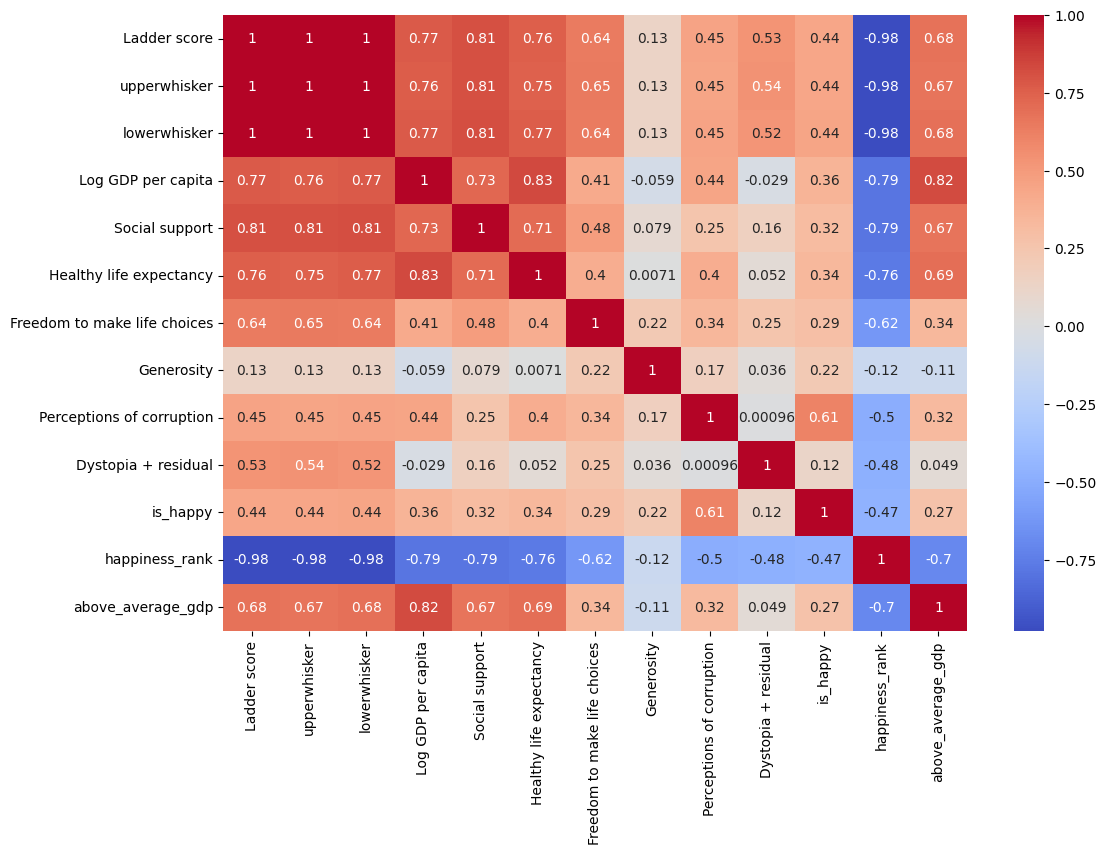

In [43]:
see = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12,8))
sns.heatmap(see,annot=True,cmap='coolwarm')
plt.show()